## **1. _Data Collection_**
---

### ***Metadata***
*   Jumlah Dataset  : 20.000 Set Data
*   Sumber Dataset  : [Kaggle Repository](https://www.kaggle.com/code/rudraprasadbhuyan/personal-finance)



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report




Load Dataset

In [ ]:
url = "https://storage.googleapis.com/tabungin-dataset/dataset/tabungin_dataset.csv"
data = pd.read_csv(url)

In [ ]:
data.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


Display Data Dimensions

In [ ]:
data.shape

(20000, 27)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,17604.875957,30185.383480,51765.446460,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,29.000000,41.000000,53.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,3649.422246,6402.751824,11263.940492,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,2627.142320,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,580.204749,1017.124681,1787.160895,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,3.866737e+04


## **2. _Exploratory Data Analysis (EDA)_**
---

> *Understand the key characteristics of a data set, uncover hidden patterns, and identify relationships between variables.  This analysis is usually done using statistical techniques and data visualization*



### ***2.1 Data Type Checking***
---

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

### ***2.2 Check & Handle Missing Value***
---

Checking for Missing Value

In [ ]:
data.isna().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


### ***2.3 Check & Handle Outliers***
---

In [ ]:
all_features = [
    'Income', 'Age','Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
    'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous'
]
numerical_features = [
    'Income', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
    'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous'
]
categorical_features = ['Age', 'Dependents']

In [ ]:
# Fungsi Melihat Outlier
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

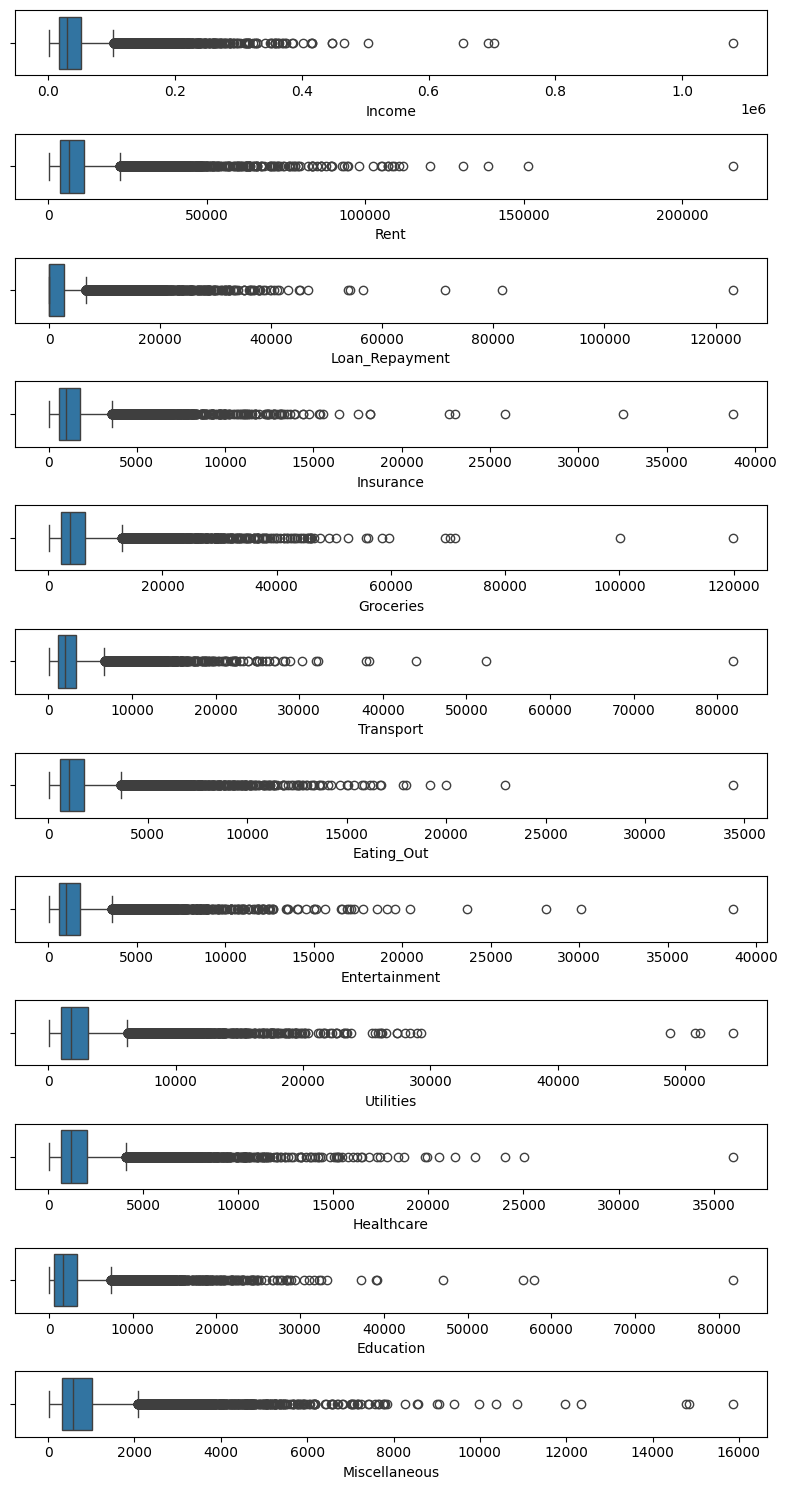

In [ ]:
numerical_dis_plot(
    features=numerical_features,
    df=data
)

In [ ]:
def show_Outlier(data, column_name):
  Q1 = data[column_name].quantile(0.25)
  Q3 = data[column_name].quantile(0.75)
  IQR = Q3 - Q1

  print(f'Nilai Ambang Batas Atas (Maksimum) {column_name} : ', round(Q3 + 1.5 * IQR))
  print('Jumlah Outlier Melebihi Max : ', data[data[column_name] > (Q3 + 1.5 * IQR)][column_name].count())
  data[data[column_name] > (Q3 + 1.5 * IQR)].sort_values(by=column_name)

  print(f'Nilai Ambang Batas Bawah (Minimum) {column_name} : ', round(Q1 - 1.5 * IQR))
  print('Jumlah Outlier Kurang dari Min : ', data[data[column_name] < (Q1 - 1.5 * IQR)][column_name].count())
  data[data[column_name] < (Q1 - 1.5 * IQR)].sort_values(by=column_name)

In [ ]:
show_Outlier(data, 'Income')
print('====================================')
show_Outlier(data, 'Age')
print('====================================')
show_Outlier(data, 'Dependents')
print('====================================')
show_Outlier(data, 'Rent')
print('====================================')
show_Outlier(data, 'Loan_Repayment')
print('====================================')
show_Outlier(data, 'Insurance')
print('====================================')
show_Outlier(data, 'Groceries')
print('====================================')
show_Outlier(data, 'Transport')
print('====================================')
show_Outlier(data, 'Eating_Out')
print('====================================')
show_Outlier(data, 'Entertainment')
print('====================================')
show_Outlier(data, 'Utilities')
print('====================================')
show_Outlier(data, 'Healthcare')
print('====================================')
show_Outlier(data, 'Education')
print('====================================')
show_Outlier(data, 'Miscellaneous')

Nilai Ambang Batas Atas (Maksimum) Income :  103006
Jumlah Outlier Melebihi Max :  1254
Nilai Ambang Batas Bawah (Minimum) Income :  -33636
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Age :  89
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Age :  -7
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Dependents :  6
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Dependents :  -2
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Rent :  22686
Jumlah Outlier Melebihi Max :  1320
Nilai Ambang Batas Bawah (Minimum) Rent :  -7772
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Loan_Repayment :  6568
Jumlah Outlier Melebihi Max :  1880
Nilai Ambang Batas Bawah (Minimum) Loan_Repayment :  -3941
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Insurance :  3598
Jumlah Outlier Melebihi Max :  1375
Nilai Ambang Batas Bawah (Minimum) Insurance 

Checking data distribution before outliers are dealt with

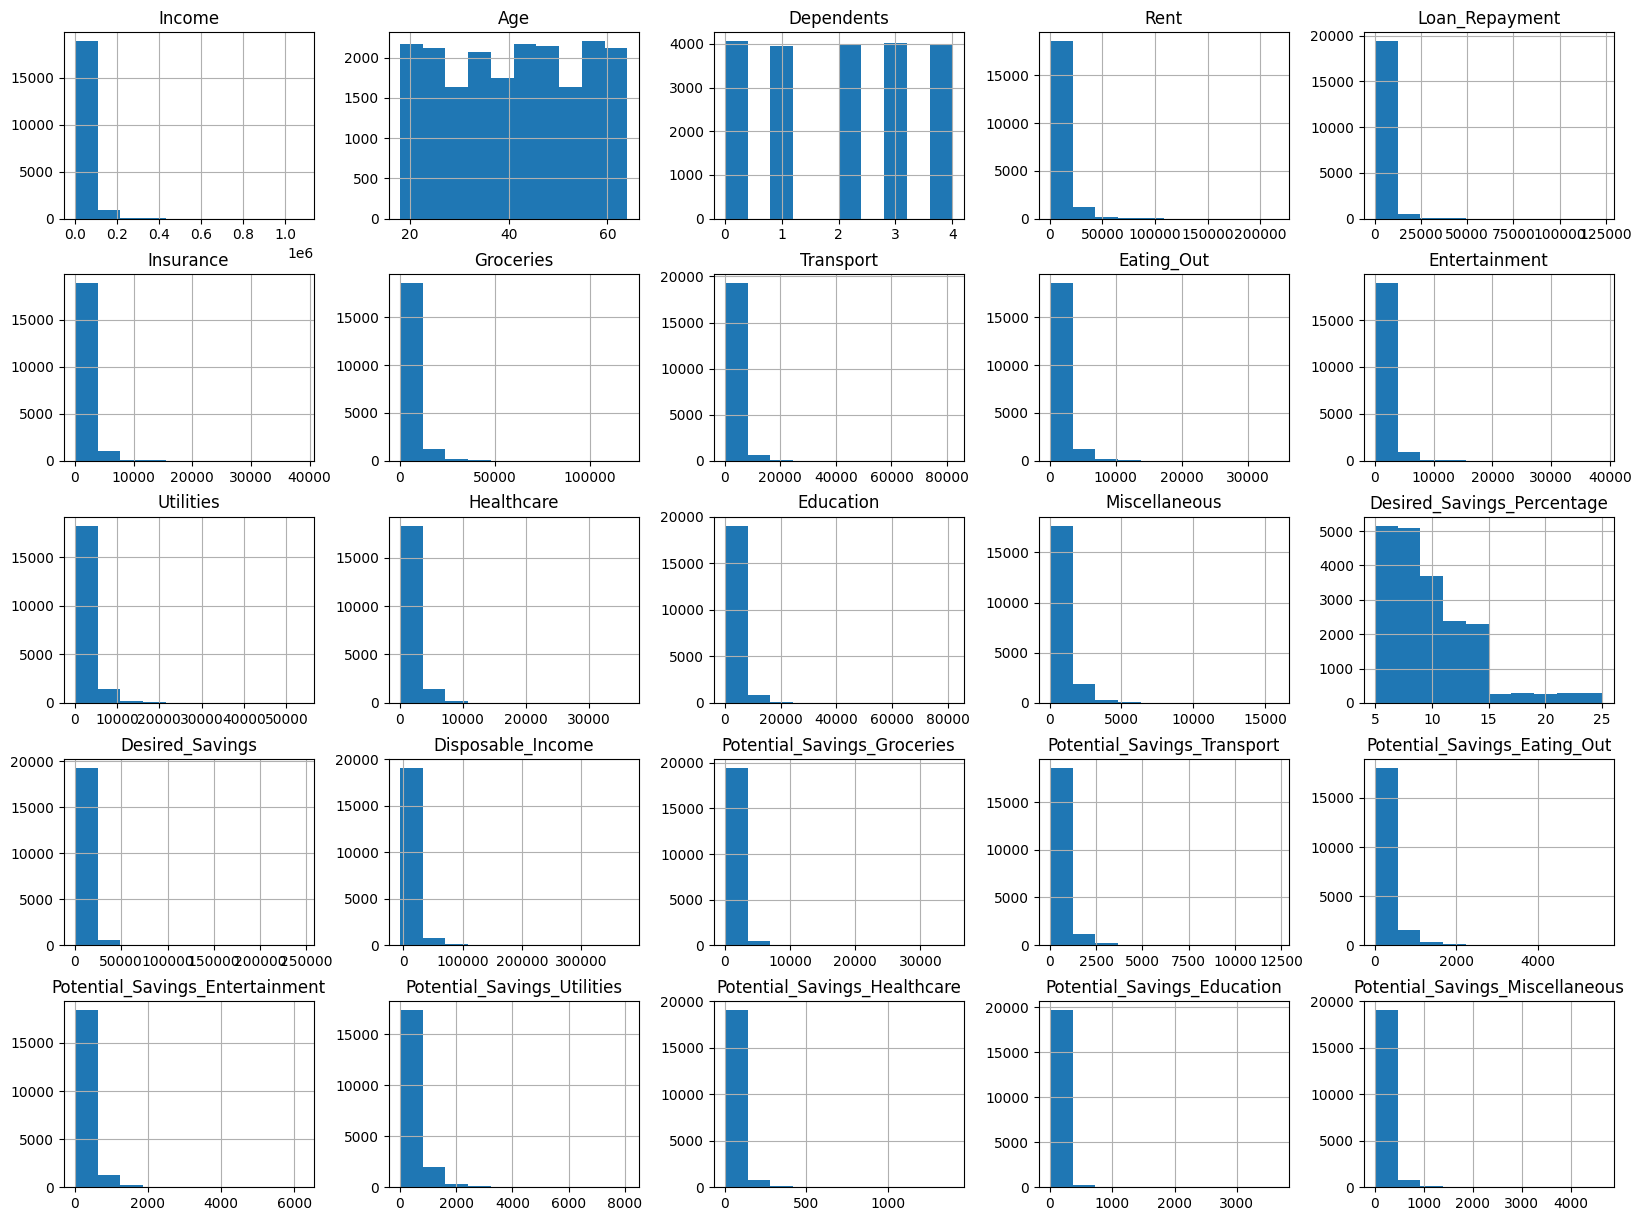

In [ ]:
data.hist(figsize=(20,15))
plt.show()

Convert dollar value to rupiah

In [ ]:
# Nilai kurs (1 USD ke IDR)
usd_to_idr = 15000

# Daftar kolom yang akan dikonversi
columns_to_convert = [
    'Income', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport',
    'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education',
    'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
    'Disposable_Income', 'Potential_Savings_Groceries',
    'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare', 'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]

# Konversi dolar ke rupiah
data[columns_to_convert] = data[columns_to_convert] * usd_to_idr
# Mengatur format tampilan angka menjadi notasi ilmiah dengan 2 angka di belakang koma
pd.set_option('display.float_format', '{:.2e}'.format)

In [ ]:
data.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,6.70e+08,49,0,Self_Employed,Tier_1,2.01e+08,0.00e+00,3.31e+07,9.99e+07,3.96e+07,...,9.30e+07,1.69e+08,2.53e+07,4.93e+06,6.99e+06,2.93e+06,1.02e+07,1.02e+06,0.00e+00,1.29e+06
1,4.03e+08,34,2,Retired,Tier_2,8.06e+07,0.00e+00,1.30e+07,4.23e+07,2.31e+07,...,2.88e+07,1.45e+08,8.10e+06,1.79e+06,2.13e+06,3.51e+06,4.30e+06,9.90e+04,8.45e+05,1.46e+06
2,7.56e+08,35,1,Student,Tier_3,1.13e+08,6.92e+07,3.30e+07,9.47e+07,4.83e+07,...,1.06e+08,2.08e+08,2.20e+07,7.10e+06,6.16e+06,6.90e+06,7.33e+06,1.09e+05,1.60e+06,2.08e+06
3,1.52e+09,21,0,Self_Employed,Tier_3,2.28e+08,1.02e+08,7.33e+07,2.20e+08,1.07e+08,...,2.50e+08,4.74e+08,2.81e+07,1.14e+07,1.86e+07,4.80e+06,2.08e+07,2.90e+06,0.00e+00,4.44e+06
4,3.73e+08,52,4,Professional,Tier_2,7.46e+07,4.67e+07,9.54e+06,4.55e+07,1.91e+07,...,2.81e+07,9.40e+07,1.18e+07,1.02e+06,9.26e+05,2.81e+06,2.91e+06,7.09e+05,1.01e+06,1.45e+06


####handle outliers with Z-Score

In [ ]:
#import numpy as np
#from scipy.stats import zscore

# Contoh DataFrame
#data = pd.DataFrame({
#    'Income': [5000, 7000, 6000, 120000, 5500],
#    'Rent': [1500, 1700, 1600, 3000, 1800],
#    'Loan_Repayment': [2000, 2200, 2100, 2500, 40000],
#    'Insurance': [500, 550, 520, 600, 580],
#   'Groceries': [300, 320, 310, 5000, 350],
#   'Transport' : [500, 550, 520, 600, 580],
#    'Eating_Out' : [500, 550, 520, 600, 580],
#    'Entertainment': [500, 550, 520, 600, 580],
 #   'Utilities' : [500, 550, 520, 600, 580],
 #   'Healthcare' : [500, 550, 520, 600, 580],
  #  'Education' : [500, 550, 520, 600, 580],
 #   'Miscellaneous' : [500, 550, 520, 600, 580]
#})

# Daftar kolom yang ingin diperiksa untuk outlier
#columns_to_check = [
#    'Income', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
#    'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
 #   'Healthcare', 'Education', 'Miscellaneous'
#]

# Iterasi melalui kolom dan hitung Z-score
#for column in columns_to_check:
#    data[f'z_score_{column}'] = zscore(data[column])

# Identifikasi outlier di semua kolom (Z-score > 3 atau < -3)
#outlier_mask = np.any([abs(data[f'z_score_{column}']) > 3 for column in columns_to_check], axis=0)

# Hapus baris yang memiliki outlier di salah satu kolom
#data_cleaned = data[~outlier_mask]

# Hapus kolom Z-score setelah pembersihan
#data_cleaned = data_cleaned.drop(columns=[f'z_score_{column}' for column in columns_to_check])

# Tampilkan data setelah pembersihan
#print("Data setelah outlier dihapus:")
#print(data_cleaned)


####Handle Outliers with IQR

In [ ]:
#def replace_outliers_with_iqr(df,column_name):
#melihat outlier TIBC
#  Q1 = df[column_name].quantile(0.25)
#   Q3 = df[column_name].quantile(0.75)
#   IQR = Q3 - Q1

 #  print(Q3 + 1.5 * IQR)
#   print('Jumlah Outlier Melebihi Max : ', df[df[column_name] > (Q3 + 1.5 * IQR)].count())
 #  df[df[column_name] > (Q3 + 1.5 * IQR)].sort_values(by=column_name)

#   print(Q1 - 1.5 * IQR)
#   print('Jumlah Outlier Kurang dari Min : ', df[df[column_name] < (Q1 - 1.5 * IQR)].count())
#  df[df[column_name] < (Q1 - 1.5 * IQR)].sort_values(by=column_name)

#  #mengubah nilai outlier dengan IQR
#   df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) |(df[column_name] > (Q3 + 1.5 * IQR)))]

 #  return df

In [ ]:
#data = replace_outliers_with_iqr(data,'Income')
#data = replace_outliers_with_iqr(data,'Age')
#data = replace_outliers_with_iqr(data,'Dependents')
#data = replace_outliers_with_iqr(data,'Rent')
#data = replace_outliers_with_iqr(data,'Loan_Repayment')
#data = replace_outliers_with_iqr(data,'Insurance')
#data = replace_outliers_with_iqr(data,'Groceries')
#data = replace_outliers_with_iqr(data,'Transport')
#data = replace_outliers_with_iqr(data,'Eating_Out')
#data = replace_outliers_with_iqr(data,'Entertainment')
#data = replace_outliers_with_iqr(data,'Utilities')
#data = replace_outliers_with_iqr(data,'Healthcare')
#data = replace_outliers_with_iqr(data,'Education')
#data = replace_outliers_with_iqr(data,'Miscellaneous')

####Handling outliers with IQR upper and lower bounds

In [ ]:
# Daftar kolom yang akan ditangani outliernya
columns = ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
           'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
           'Healthcare', 'Education', 'Miscellaneous']

# Menangani outlier untuk setiap kolom
for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan batas bawah atau atas
    data.loc[data[column] > upper_bound, column] = upper_bound
    data.loc[data[column] < lower_bound, column] = lower_bound


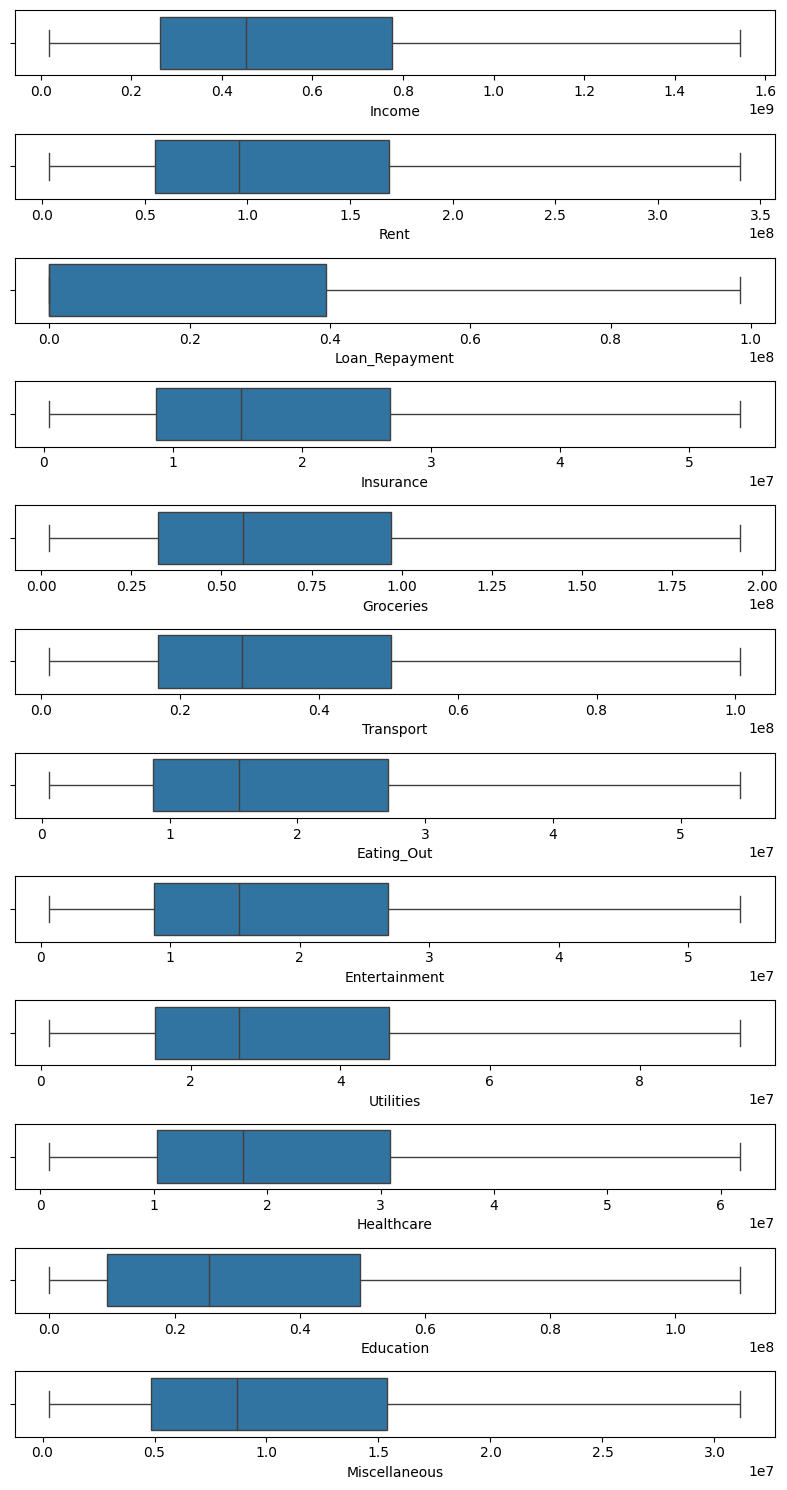

In [ ]:
numerical_dis_plot(
    features=numerical_features,
    df=data
)

In [ ]:
def show_Outlier(data, column_name):
  Q1 = data[column_name].quantile(0.25)
  Q3 = data[column_name].quantile(0.75)
  IQR = Q3 - Q1

  print(f'Nilai Ambang Batas Atas (Maksimum) {column_name} : ', round(Q3 + 1.5 * IQR))
  print('Jumlah Outlier Melebihi Max : ', data[data[column_name] > (Q3 + 1.5 * IQR)][column_name].count())
  data[data[column_name] > (Q3 + 1.5 * IQR)].sort_values(by=column_name)

  print(f'Nilai Ambang Batas Bawah (Minimum) {column_name} : ', round(Q1 - 1.5 * IQR))
  print('Jumlah Outlier Kurang dari Min : ', data[data[column_name] < (Q1 - 1.5 * IQR)][column_name].count())
  data[data[column_name] < (Q1 - 1.5 * IQR)].sort_values(by=column_name)

In [ ]:
show_Outlier(data, 'Income')
print('====================================')
show_Outlier(data, 'Age')
print('====================================')
show_Outlier(data, 'Dependents')
print('====================================')
show_Outlier(data, 'Rent')
print('====================================')
show_Outlier(data, 'Loan_Repayment')
print('====================================')
show_Outlier(data, 'Insurance')
print('====================================')
show_Outlier(data, 'Groceries')
print('====================================')
show_Outlier(data, 'Transport')
print('====================================')
show_Outlier(data, 'Eating_Out')
print('====================================')
show_Outlier(data, 'Entertainment')
print('====================================')
show_Outlier(data, 'Utilities')
print('====================================')
show_Outlier(data, 'Healthcare')
print('====================================')
show_Outlier(data, 'Education')
print('====================================')
show_Outlier(data, 'Miscellaneous')

Nilai Ambang Batas Atas (Maksimum) Income :  1545094533
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Income :  -504539697
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Age :  89
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Age :  -7
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Dependents :  6
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Dependents :  -2
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Rent :  340285768
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Rent :  -116585327
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Loan_Repayment :  98517837
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Minimum) Loan_Repayment :  -59110702
Jumlah Outlier Kurang dari Min :  0
Nilai Ambang Batas Atas (Maksimum) Insurance :  53963927
Jumlah Outlier Melebihi Max :  0
Nilai Ambang Batas Bawah (Mi

### ***2.4 Data Normalization***

In [ ]:
columns_to_normalize = [
    'Income', 'Rent', 'Loan_Repayment', 'Insurance',
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage',
    'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries',
    'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare', 'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standardisasi hanya pada kolom yang dipilih
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


In [ ]:
data.shape

(20000, 27)

### ***2.4 Checking Data Distributions & Centering***
---

In [ ]:
data.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,...,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04,2.00e+04
mean,-2.22e-16,4.10e+01,2.00e+00,2.24e-17,-1.60e-17,6.32e-17,-6.96e-17,-9.95e-18,3.69e-17,4.33e-17,...,-7.46e-18,-1.89e-16,-1.09e-16,1.04e-16,-7.11e-17,-1.21e-17,6.11e-17,2.13e-18,-6.18e-17,-1.04e-16
std,1.00e+00,1.36e+01,1.42e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,...,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.36e+00,1.80e+01,0.00e+00,-1.32e+00,-6.63e-01,-1.32e+00,-1.35e+00,-1.35e+00,-1.31e+00,-1.31e+00,...,-6.44e-01,-1.37e+00,-8.62e-01,-8.65e-01,-8.48e-01,-8.36e-01,-8.55e-01,-7.81e-01,-6.31e-01,-8.44e-01
25%,-7.60e-01,2.90e+01,1.00e+00,-7.64e-01,-6.63e-01,-7.60e-01,-7.65e-01,-7.62e-01,-7.63e-01,-7.60e-01,...,-4.86e-01,-5.85e-01,-5.72e-01,-5.79e-01,-5.76e-01,-5.65e-01,-5.73e-01,-5.74e-01,-5.82e-01,-5.75e-01
50%,-2.99e-01,4.10e+01,2.00e+00,-3.13e-01,-6.63e-01,-3.13e-01,-3.06e-01,-3.09e-01,-3.07e-01,-3.09e-01,...,-3.66e-01,-2.92e-01,-2.94e-01,-3.09e-01,-3.04e-01,-2.98e-01,-2.99e-01,-3.07e-01,-2.96e-01,-3.06e-01
75%,4.92e-01,5.30e+01,3.00e+00,4.81e-01,4.89e-01,4.74e-01,4.89e-01,4.91e-01,4.84e-01,4.83e-01,...,1.59e-01,2.29e-01,2.08e-01,2.15e-01,1.97e-01,1.90e-01,2.04e-01,2.04e-01,1.87e-01,1.97e-01
max,2.37e+00,6.40e+01,4.00e+00,2.35e+00,2.22e+00,2.32e+00,2.37e+00,2.37e+00,2.35e+00,2.35e+00,...,3.11e+01,3.12e+01,3.27e+01,2.20e+01,1.80e+01,1.99e+01,1.52e+01,2.55e+01,3.63e+01,2.66e+01


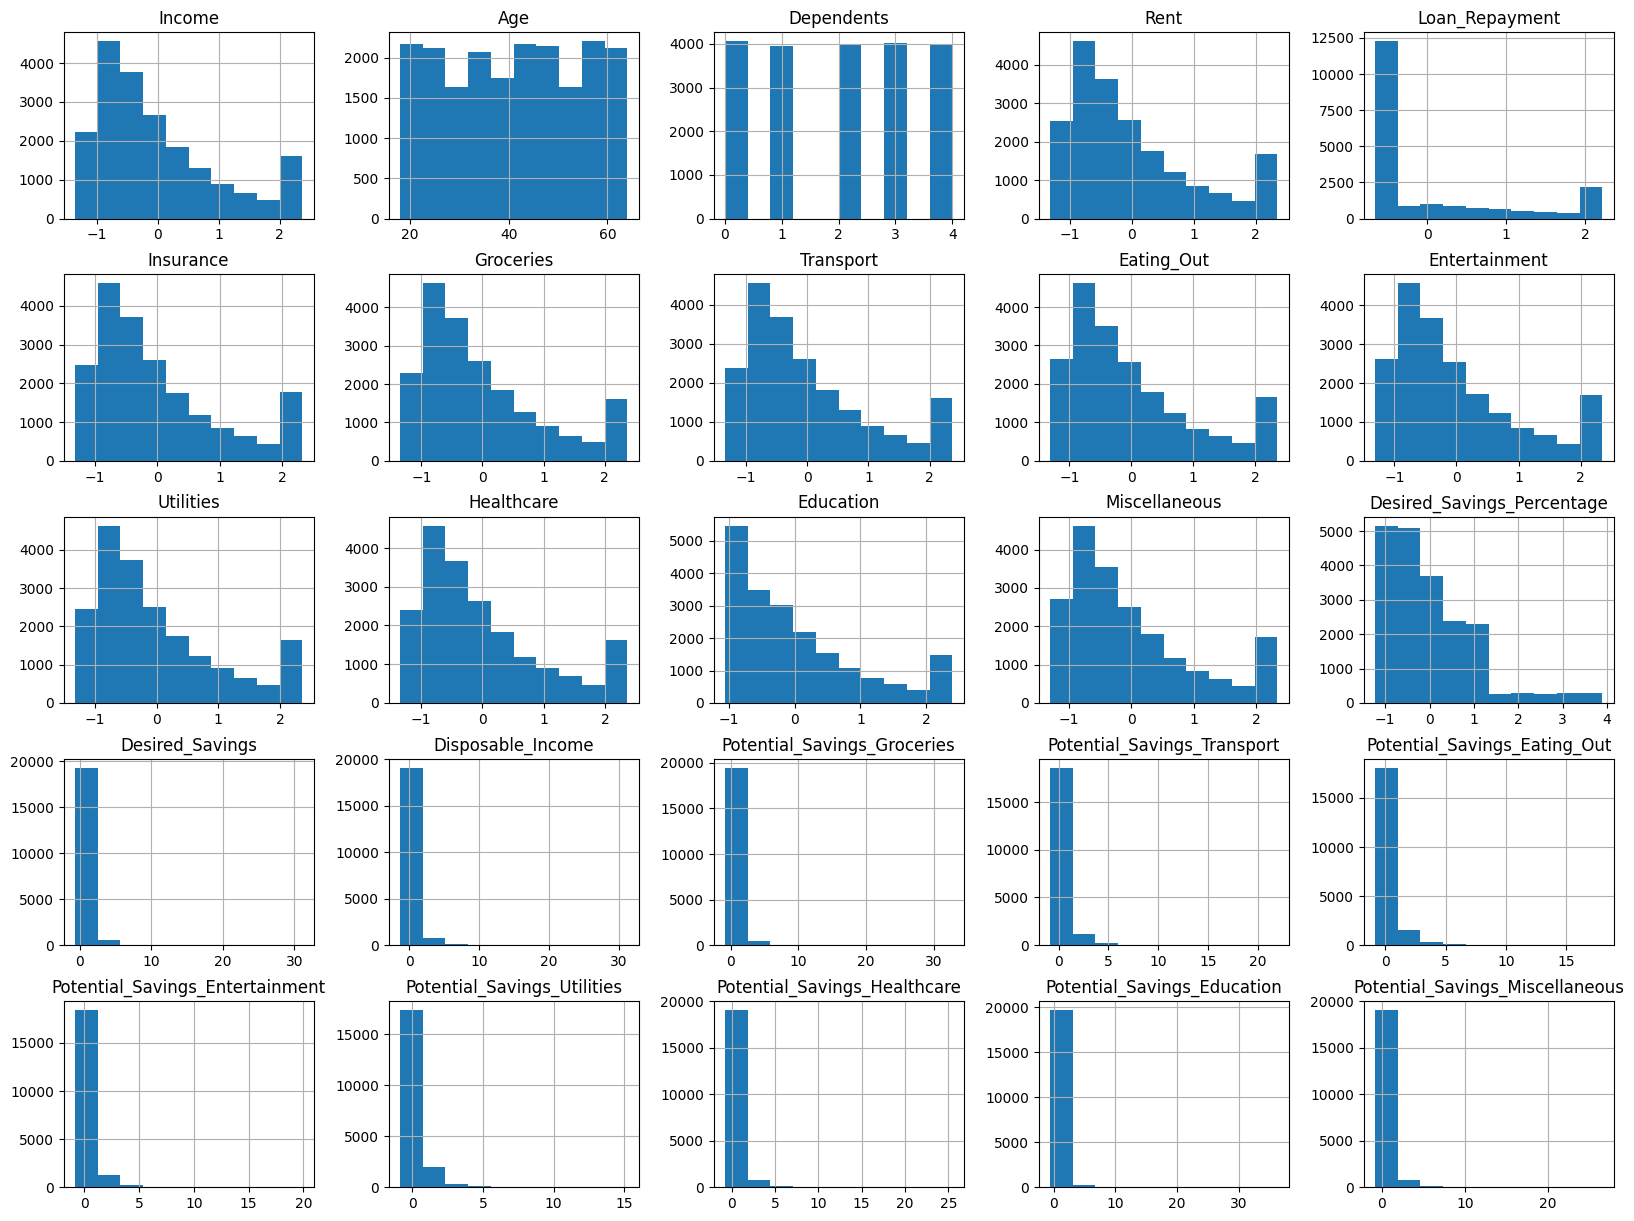

In [ ]:
data.hist(figsize=(20,15))
plt.show()

## **3. _Model_**

####LinearRegression

In [ ]:
# Defining features and targets
# Creating features and labels
X = data[['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
          'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education',
          'Miscellaneous']]
y = data['Desired_Savings'].astype(int)

# Divide the data into training data and test data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional, for linear regression to converge faster)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a linear regression model
model = LinearRegression()

# Train the model with training data
model.fit(X_train_scaled, y_train)

# Make predictions with test data
y_pred = model.predict(X_test_scaled)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Display regression coefficients for each feature
print('Koefisien regresi untuk setiap fitur:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

# Ensuring data proportion
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Mean Absolute Error (MAE): 0.32531213564431205
Mean Squared Error (MSE): 0.6369392961022675
R-squared: 0.2229931219618092
Koefisien regresi untuk setiap fitur:
Income: 0.31787023328030156
Age: -0.006488169279499054
Dependents: 0.01210236805853252
Rent: 0.018613907739686505
Loan_Repayment: -0.07022423758338346
Insurance: 0.0028004749455252395
Groceries: 0.04090963682795178
Transport: 0.029291360311544494
Eating_Out: 0.037227808586193276
Entertainment: 0.018151242987121074
Utilities: 0.01576571045124031
Healthcare: -0.032642163449773116
Education: -0.03697391113106911
Miscellaneous: 0.0035091106624722747
Training set: 16000 samples
Test set: 4000 samples


In [ ]:
def savings_reminder_user_input():
   # Collect user input
    print("Silakan masukkan detail keuangan Anda di bawah ini:")
    Income = float(input("Pendapatan Bulanan: "))
    Age = int(input("Umur: "))
    Dependents = int(input("Jumlah Tanggungan: "))
    Rent = float(input("Sewa Bulanan: "))
    Loan_Repayment = float(input("Pembayaran Pinjaman Bulanan: "))
    Insurance = float(input("Biaya Asuransi Bulanan: "))
    Groceries = float(input("Biaya Bahan Makanan Bulanan: "))
    Transport = float(input("Biaya Transportasi Bulanan: "))
    Eating_Out = float(input("Biaya Makan di Luar Bulanan: "))
    Entertainment = float(input("Biaya Hiburan Bulanan: "))
    Utilities = float(input("Biaya Utilitas Bulanan: "))
    Healthcare = float(input("Biaya Perawatan Kesehatan Bulanan: "))
    Education = float(input("Biaya Pendidikan Bulanan: "))
    Miscellaneous = float(input("Biaya Lain-lain Bulanan: "))
    # Calculating total expenses
    total_expenses = (Rent + Loan_Repayment + Insurance + Groceries +
                         Transport + Eating_Out + Entertainment + Utilities +
                         Healthcare + Education + Miscellaneous)

    # Calculating residual income
    Net_Income = Income - total_expenses

    # Determine savings advice by percentage
    # For example, 20% of income if residual income is sufficient
    if Net_Income > 0:
        savings_recommendation = max(Net_Income * 0.2, Net_Income * 0.1)  # Minimal 10% atau lebih
    else:
        savings_recommendation = 0  # Tidak ada rekomendasi jika sisa pendapatan negatif

    # Displaying results
    print(f"Penghasilan bulanan: {Income:,.0f} IDR")
    print(f"Total pengeluaran bulanan: {total_expenses:,.0f} IDR")
    print(f"Sisa pendapatan setelah pengeluaran: {Net_Income:,.0f} IDR")
    if savings_recommendation > 0:
        print(f"Saran tabungan bulanan: {savings_recommendation:,.0f} IDR")
    else:
        print("Sisa pendapatan tidak mencukupi untuk menabung. Pertimbangkan untuk mengurangi pengeluaran.")

    return savings_recommendation

In [ ]:
# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
mse = loss
print(f"Mean Squared Error (MSE) on test data: {mse:.2f}")
print(f"Mean Absolute Error (MAE) on test data: {mae:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5047 - mae: 0.3384 - val_loss: 0.5263 - val_mae: 0.2493
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3179 - mae: 0.2087 - val_loss: 0.4851 - val_mae: 0.1809
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2589 - mae: 0.1792 - val_loss: 0.4854 - val_mae: 0.1519
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2643 - mae: 0.1597 - val_loss: 0.4769 - val_mae: 0.1339
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2603 - mae: 0.1415 - val_loss: 0.4768 - val_mae: 0.1422
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2409 - mae: 0.1385 - val_loss: 0.4478 - val_mae: 0.1378
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2408 - mae: 0.1375 - val_loss: 0.4586 - val_mae: 0.1334
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2276 - mae: 0.1310 - val_loss: 0.4160 - val_mae: 0.1143
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1987 

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,317 (552.02 KB)

 Trainable params: 47,105 (184.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94,212 (368.02 KB)

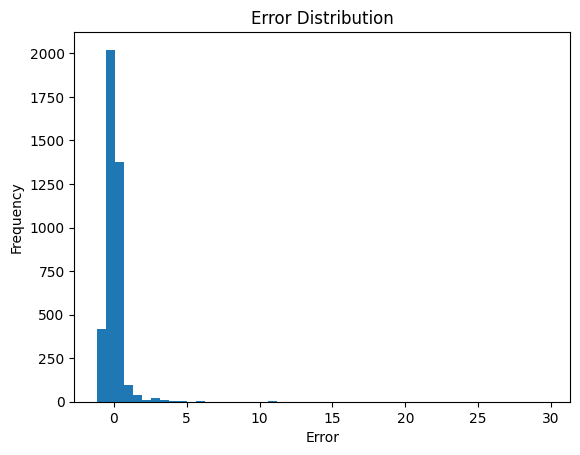

In [ ]:
error = y_test - y_pred
plt.hist(error, bins=50)
plt.title("Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Call the function to start taking user input and provide savings suggestions
savings_reminder_user_input()

Silakan masukkan detail keuangan Anda di bawah ini:
Pendapatan Bulanan: 10000000
Umur: 25
Jumlah Tanggungan: 1
Sewa Bulanan: 1000000
Pembayaran Pinjaman Bulanan: 200000
Biaya Asuransi Bulanan: 50000
Biaya Bahan Makanan Bulanan: 100000
Biaya Transportasi Bulanan: 100000
Biaya Makan di Luar Bulanan: 500000
Biaya Hiburan Bulanan: 50000
Biaya Utilitas Bulanan: 100000
Biaya Perawatan Kesehatan Bulanan: 100000
Biaya Pendidikan Bulanan: 0
Biaya Lain-lain Bulanan: 100000
Penghasilan bulanan: 10,000,000 IDR
Total pengeluaran bulanan: 2,300,000 IDR
Sisa pendapatan setelah pengeluaran: 7,700,000 IDR
Saran tabungan bulanan: 1,540,000 IDR


1540000.0

In [ ]:
import os
save_dir = "/content/models"
os.makedirs(save_dir, exist_ok=True)
model.save(os.path.join(save_dir, "my_model.keras"))


In [ ]:
from google.colab import files
files.download(os.path.join(save_dir, "my_model.keras"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1
